In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

data = pd.read_csv('iris.data',header=None)

In [61]:
X = data.iloc[:,:4].to_numpy() 
labels = data.iloc[:,4].to_numpy()
labels.size

150

In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 
Y = le.fit_transform(labels)

In [63]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.5,
                                                    random_state=0)

In [64]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 

y_pred = gnb.fit(X_train, y_train).predict(X_test) 

print((y_test != y_pred).sum()) #количество наблюдений, который были неправильно определены

4


In [65]:
gnb.score(X_test, y_test)

0.9466666666666667

In [66]:
y_test.size

75

In [67]:
clf.score(X_test, y_test)

0.28

In [68]:
y_pred.size

75

In [69]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(min_samples_split=30)

y_pred = clf.fit(X_train, y_train).predict(X_test) 
print((y_test != y_pred).sum())

8


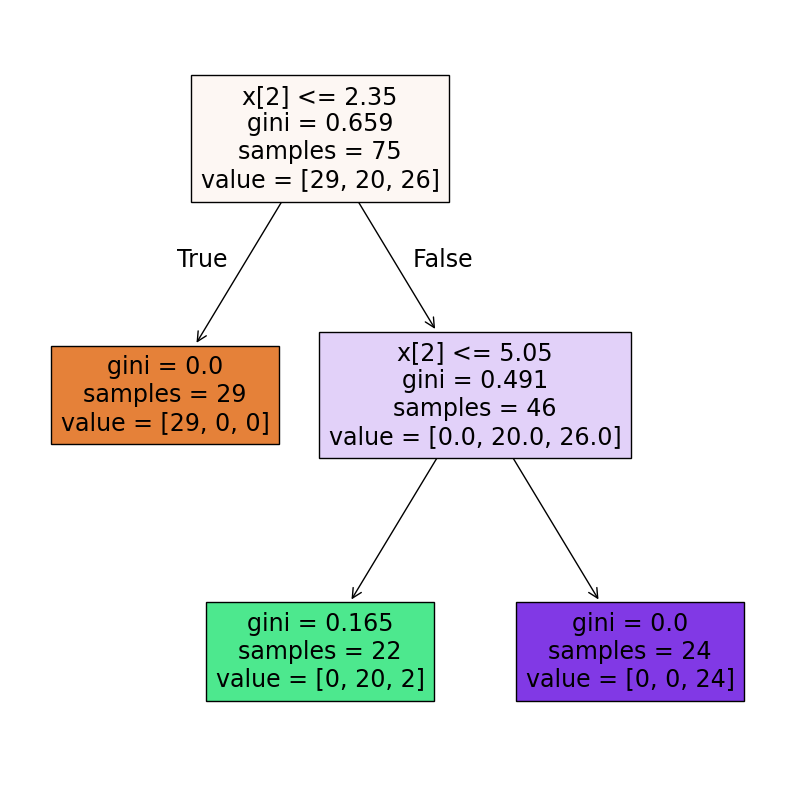

In [70]:
import matplotlib.pyplot as plt 

plt.subplots(1,1,figsize = (10,10)) 
tree.plot_tree(clf, filled=True)
plt.show()

In [71]:
np.where(X_train[:,2] > 2.35)

(array([ 1,  2,  4,  5,  6,  8,  9, 10, 11, 14, 15, 17, 19, 20, 23, 27, 28,
        29, 33, 34, 37, 39, 40, 41, 42, 44, 46, 49, 51, 52, 53, 54, 55, 56,
        57, 58, 60, 61, 62, 64, 65, 66, 67, 71, 72, 73], dtype=int64),)

In [72]:
y_pred.size

75

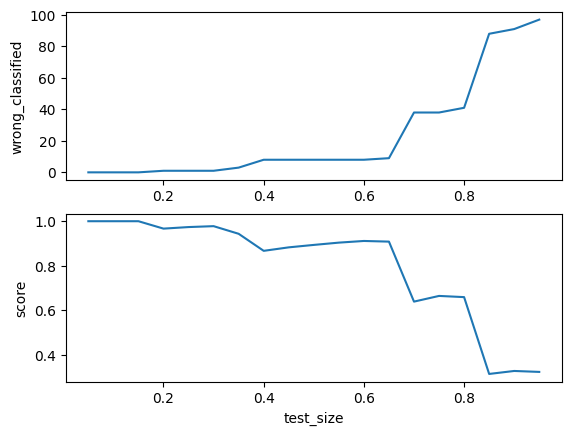

In [73]:
wrong_classified = []
score = []
test_size = []

for p in range (5, 96, 5):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=p/100,
                                                    random_state=0)
    y_pred = clf.fit(X_train, y_train).predict(X_test) 
    test_size.append(p/100)
    wrong_classified.append((y_test != y_pred).sum())
    score.append(clf.score(X_test, y_test))


fig, ax = plt.subplots(ncols=1, nrows=2)
ax[0].plot(test_size, wrong_classified)
ax[0].set_ylabel('wrong_classified')

ax[1].plot(test_size, score)
ax[1].set_ylabel('score')

plt.xlabel('test_size')
plt.show()
